# Text Analytics on Reddit Wall Street Comments  

### Project Problems Description
 Discover the most frequent occurred words within the comments

 Conduct sentiment analysis to all comments

 Using a variety of graphs to visual the key points from the comments

 Examining the most discussed topic within the comments

 Analyze the relationship between comments and AMC & GME stock data

## Part 1: Data Exploration

In [1]:
## Read in the Wall Street Comments File and show all the columns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
df=pd.read_csv('reddit_wsb.csv')
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp'],
      dtype='object')

In [2]:
## Drop the uncessary columns "id", "url","created" and check columns again 
df = df.drop('id',1)
df = df.drop('url',1)
df = df.drop('created',1)
df.columns

Index(['title', 'score', 'comms_num', 'body', 'timestamp'], dtype='object')

In [3]:
## Combine the columns "body" and "Title" 
## Column body has many NaN, so replace it with empty string before merging these two columns 
## Drop the columns "body" and "Title" after merging 
df.body = df.body.fillna('')
df['comments'] = df['title'].str.cat(df['body'], sep =" ")
df = df.drop('title',1)
df = df.drop('body',1)
df

,score,comms_num,timestamp,comments
0,55,6,2021-01-28 21:37:41,"It's not about the money, it's about sending a..."
1,110,23,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...
3,29,74,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC..."
...,...,...,...,...
36663,13299,1030,2021-02-26 04:34:35,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE He...
36664,18,7,2021-02-26 04:33:52,Stonkk
36665,56,13,2021-02-26 04:33:37,I like the stock 🇨🇦
36666,191,7,2021-02-26 04:32:16,IDK WHO NEEDS TO SEE THIS BUT I LIKE THE WREST...


In [4]:
## Convert timestamp to date format and extract day and hour from it for further data exploration steps 
df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['date'] = df.datetime.dt.date
df['hour'] = df.datetime.dt.hour
df = df.drop('timestamp',1)
df

,score,comms_num,comments,datetime,date,hour
0,55,6,"It's not about the money, it's about sending a...",2021-01-28 21:37:41,2021-01-28,21
1,110,23,Math Professor Scott Steiner says the numbers ...,2021-01-28 21:32:10,2021-01-28,21
2,0,47,Exit the system The CEO of NASDAQ pushed to ha...,2021-01-28 21:30:35,2021-01-28,21
3,29,74,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,2021-01-28 21:28:57,2021-01-28,21
4,71,156,"Not to distract from GME, just thought our AMC...",2021-01-28 21:26:56,2021-01-28,21
...,...,...,...,...,...,...
36663,13299,1030,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE He...,2021-02-26 04:34:35,2021-02-26,4
36664,18,7,Stonkk,2021-02-26 04:33:52,2021-02-26,4
36665,56,13,I like the stock 🇨🇦,2021-02-26 04:33:37,2021-02-26,4
36666,191,7,IDK WHO NEEDS TO SEE THIS BUT I LIKE THE WREST...,2021-02-26 04:32:16,2021-02-26,4


In [5]:
# Remove the rows with abnormal datadate (eg. 2020-09-28)
from datetime import datetime
df = df[df.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').between('2021-01-28 00:00:00','2021-02-28 00:00:00')]

In [6]:
## we wanted to do some data exploration on the the mean score and to see how many comments are posted. 
df["post_count"] = 1
agg_date = df.groupby("date").aggregate({"score": "mean", "post_count": "sum"})
agg_hour = df.groupby("hour").aggregate({"score": "mean", "post_count": "sum"})

### We used the existing codes here from Kaggle: df[post_count], agg_date...., and agg_hour.....
https://www.kaggle.com/melvinlinus/sentimental-analysis-of-r-wallstreetbets-posts 

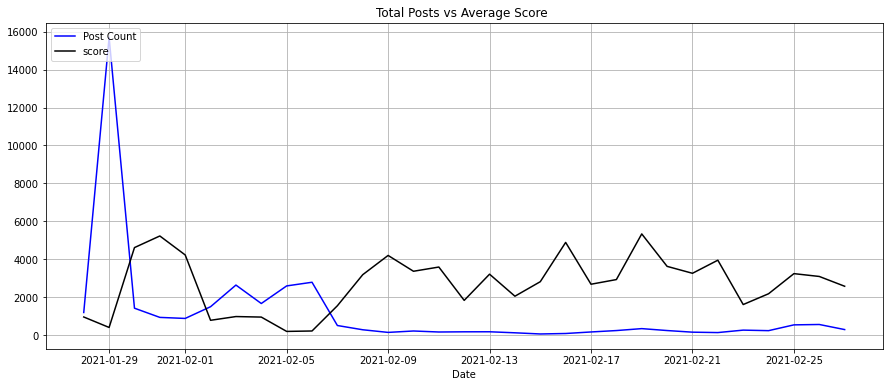

In [7]:
## let's explore the mean score and posted count by date here 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(agg_date.post_count, "-b", label="Post Count")
plt.plot(agg_date.score, "-k", label="score")
plt.legend(loc="upper left")
plt.title("Total Posts vs Average Score ")
plt.xlabel("Date")
plt.grid(axis='both')
plt.show()

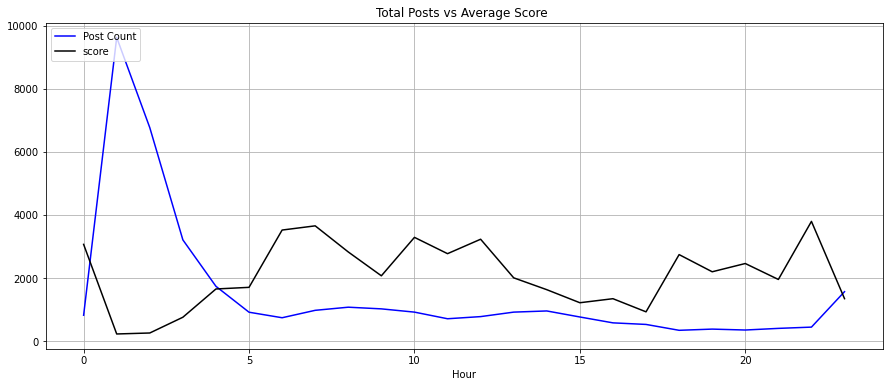

In [8]:
## let's explore the mean score and posted count by hour here
plt.figure(figsize=(15, 6))
plt.plot(agg_hour.post_count, "-b", label="Post Count")
plt.plot(agg_hour.score, "-k", label="score")
plt.legend(loc="upper left")
plt.title("Total Posts vs Average Score ")
plt.xlabel("Hour")
plt.grid(axis='both')
plt.show()

# Part 2: Text Data Cleaning

In [9]:
## Replace urls, non-english-letters, and punctuations 
import re  
df["comments"]=[re.sub('https://\S+', 'urltoken' ,s) for s in df["comments"]] # Replace any URls in the comments  
df["comments"]=[re.sub('[^a-zA-Z0-9]', ' ', s) for s in df["comments"]] # Replace anything non-english-letter by a whitespace
re_punc = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]') 
df["comments"] = [re.sub(re_punc, '' ,s) for s in df["comments"]] # Relace any punctuations
df["comments"] = [re.sub('[0-9]', '', s) for s in df["comments"]] # Relace any digits

We only keep emojis on purpose since we wanted to use them for future analysis

In [10]:
## Cleaning steps 
from collections import Counter              
import nltk                                  
import itertools   
global_stopwords = nltk.corpus.stopwords.words("english") 
global_stopwords = global_stopwords + ["like"]+ ["get"]+ ["want"]+["think"]
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
temptext=[]                               
for doc in df["comments"]:                 
  tokens = nltk.word_tokenize(doc)       
  tokens = [s.lower() for s in tokens]   
  tokens = [s for s in tokens if s not in global_stopwords] 
  tokens = [s for s in tokens if len(s)>2]                 
  tokens = [stemmer.stem(s) for s in tokens]                
  doc = " ".join(tokens)              
  temptext.append(doc)                
df["comments"]=temptext

# Part 3: Applying different DTMs: Discover the Most Frequent Words

### Traditional Vectorizer

In [11]:
## Apply Traditional Vectorizer
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
DTM = vectorizer.fit_transform(df["comments"])
df_normal = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyNormal': DTM.sum(axis=0).tolist()[0]
                  })

df_normal.sort_values(by="FrequencyNormal",inplace=True,ascending=False)
df_normal.reset_index(inplace=True,drop=True)
df_normal.head(30)

,Term,FrequencyNormal
0,gme,19110
1,stock,15602
2,buy,15412
3,short,13771
4,share,13733
5,hold,12950
6,urltoken,10596
7,market,9975
8,sell,9328
9,fuck,9175


### TFIDF Vectorizer

In [12]:
## Apply TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(use_idf=True,
                           smooth_idf=True,
                           norm=None)
DTM1 = vectorizer.fit_transform(df["comments"])
df_TFIDF = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyTFIDF': DTM1.sum(axis=0).tolist()[0]
                  })

df_TFIDF.sort_values(by="FrequencyTFIDF",inplace=True,ascending=False)
df_TFIDF.reset_index(inplace=True,drop=True)
df_TFIDF.head(30)

,Term,FrequencyTFIDF
0,short,42942.546765
1,gme,41821.822996
2,stock,41126.013172
3,share,40195.261697
4,buy,37456.066578
5,urltoken,35497.698772
6,hold,31894.140864
7,market,31270.163493
8,price,29477.573864
9,fuck,27588.220798


### Binary Vectorizer

In [13]:
## Apply Binary Vectorizer
vectorizer=CountVectorizer(binary=True)
DTM2 = vectorizer.fit_transform(df["comments"])
df_Binary = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyBinary': DTM2.sum(axis=0).tolist()[0]
                  })

df_Binary.sort_values(by="FrequencyBinary",inplace=True,ascending=False)
df_Binary.reset_index(inplace=True,drop=True)
df_Binary.head(30)

,Term,FrequencyBinary
0,gme,11134
1,buy,8742
2,hold,8462
3,stock,7117
4,sell,5493
5,share,5320
6,fuck,4911
7,robinhood,4682
8,make,4519
9,short,4393


### Vecotr Normalization L1

In [14]:
## Apply Vecotr Normalization L1
vectorizer=TfidfVectorizer(use_idf=True,
                            smooth_idf=True,
                            norm="l1")
DTM3 = vectorizer.fit_transform(df["comments"])
df_l1 = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyL1': DTM3.sum(axis=0).tolist()[0]
                  })

df_l1.sort_values(by="FrequencyL1",inplace=True,ascending=False)
df_l1.reset_index(inplace=True,drop=True)
df_l1.head(30)

,Term,FrequencyL1
0,hold,663.974656
1,gme,565.553342
2,buy,490.533042
3,amc,376.719293
4,robinhood,317.391098
5,sell,313.748401
6,fuck,285.457005
7,stock,271.971834
8,moon,254.662308
9,still,229.125872


### Vecotr Normalization L2

In [15]:
## Apply Vecotr Normalization L2
vectorizer=TfidfVectorizer(use_idf=True,
                            smooth_idf=True,
                            norm="l2")
DTM4 = vectorizer.fit_transform(df["comments"])
df_l2 = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyL2': DTM4.sum(axis=0).tolist()[0]
                  })

df_l2.sort_values(by="FrequencyL2",inplace=True,ascending=False)
df_l2.reset_index(inplace=True,drop=True)
df_l2.head(30)

,Term,FrequencyL2
0,gme,1542.865276
1,hold,1515.398252
2,buy,1353.245617
3,amc,949.032598
4,robinhood,906.299156
5,stock,894.649651
6,sell,872.836787
7,fuck,854.281589
8,share,731.304034
9,short,636.327984


### N-Gram

In [16]:
## Apply N-Gram
vectorizer=CountVectorizer(ngram_range=(2,2))
DTM5= vectorizer.fit_transform(df["comments"])
df_gram = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyN_GRAM': DTM5.sum(axis=0).tolist()[0]
                  })

df_gram.sort_values(by="FrequencyN_GRAM",inplace=True,ascending=False)
df_gram.reset_index(inplace=True,drop=True)
df_gram.head(30)

,Term,FrequencyN_GRAM
0,hedg fund,3616
1,gme amc,1696
2,buy gme,1598
3,short interest,1466
4,financi advic,1412
5,diamond hand,1391
6,short squeez,1364
7,wall street,1347
8,retail investor,1038
9,hold line,973


### Merge and normalize all the DTM results

In [17]:
# We find the common terms in each vectorizer
dffirsttwo = pd.merge(df_normal, df_TFIDF, on="Term")
dfthree = pd.merge(df_Binary, dffirsttwo, on="Term")
dffour = pd.merge(dfthree, df_l1, on="Term")
dfall = pd.merge(dffour, df_l2, on="Term")
dfall['FrequencyBinary']=dfall['FrequencyBinary']/dfall['FrequencyBinary'].sum()
dfall['FrequencyNormal']=dfall['FrequencyNormal']/dfall['FrequencyNormal'].sum()
dfall['FrequencyTFIDF']=dfall['FrequencyTFIDF']/dfall['FrequencyTFIDF'].sum()
dfall['FrequencyL1']=dfall['FrequencyL1']/dfall['FrequencyL1'].sum()
dfall['FrequencyL2']=dfall['FrequencyL2']/dfall['FrequencyL2'].sum()
dfall.head(30)

,Term,FrequencyBinary,FrequencyNormal,FrequencyTFIDF,FrequencyL1,FrequencyL2
0,gme,0.010662,0.012799,0.005445,0.015571,0.011373
1,buy,0.008371,0.010322,0.004877,0.013505,0.009975
2,hold,0.008103,0.008673,0.004153,0.018280,0.011171
3,stock,0.006815,0.010450,0.005355,0.007488,0.006595
4,sell,0.005260,0.006248,0.003516,0.008638,0.006434
5,share,0.005095,0.009198,0.005233,0.005297,0.005391
6,fuck,0.004703,0.006145,0.003592,0.007859,0.006297
7,robinhood,0.004484,0.005053,0.003001,0.008738,0.006681
8,make,0.004327,0.004950,0.002974,0.002758,0.003125
9,short,0.004207,0.009223,0.005591,0.004046,0.004691


### Showing results via a bar chart

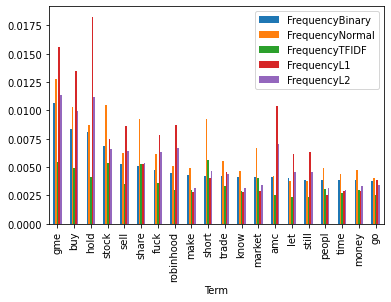

In [18]:
dfgraph = dfall.head(20) 
ax = dfgraph.plot.bar(x='Term', y=list(dfgraph.columns[1:6])) 
plt.show()

***After performing the DTM analysis above, we believe that N-Gram frequent words give us more meanigful information, so we wanted to explore N-Gram frequent words more. ***

### Word Cloud Visualization

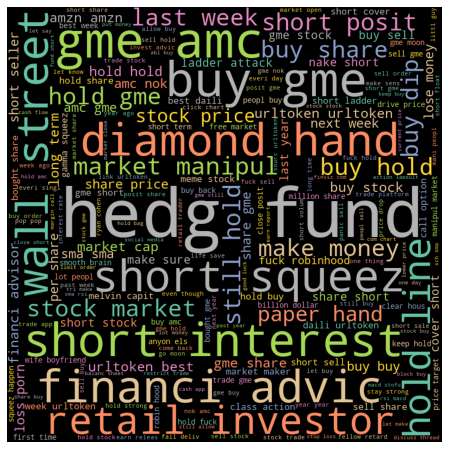

In [19]:
## Word Cloud for N-Gram DTM
from PIL import Image 
from wordcloud import WordCloud 
dictfreq = dict(zip(df_gram.Term,df_gram.FrequencyN_GRAM)) 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      prefer_horizontal=0.9,
                      colormap='Set2', 
                      contour_width=10, 
                      contour_color='black',
                      min_font_size = 10).generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

### The top-20 frequent terms using N-Gram vectorizer

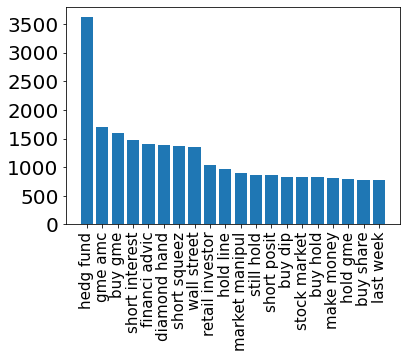

In [20]:
top = 20                                              #how many top terms to show
fig, ax = plt.subplots()
ax.bar(df_gram.Term[0:top],df_gram.FrequencyN_GRAM[0:top])  #define x and y axis.
plt.rcParams['figure.figsize'] = (11,5)               #Figure size displayed in notebook
plt.xticks(rotation=90,fontsize= 15)                  #Rotate and size x labels. 
plt.yticks(fontsize= 20)                              #size y labels.  
plt.show()

# Part 4: Sentimental & Emotional Analysis

### VADER

In [21]:
# We are interested in VADER package for doing the sentimental analysis 
# because our comments come from the social media and have a lot of emojios in it. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df.comments]

### TextBlob

In [22]:
# Textblob
from textblob import TextBlob
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df.comments]

### AFINN

In [23]:
# AFINN
from afinn import Afinn
afinn = Afinn(emoticons=True) 
df["AFINN"]=[afinn.score(s) for s in df.comments]

### Results Table

In [24]:
# Show the results
df[["comments","AFINN","TextBlob","VADER"]].head(20)

,comments,AFINN,TextBlob,VADER
0,money send messag,0.0,0.000000,0.0000
1,math professor scott steiner say number spell ...,0.0,0.000000,0.0772
2,exit system ceo nasdaq push halt trade give in...,0.0,0.042235,0.5994
3,new sec file gme someon less retard pleas inte...,-2.0,-0.257576,-0.4779
4,distract gme thought amc brother awar,-2.0,0.000000,-0.2960
5,break,0.0,0.000000,0.0000
6,short stock expir date hedgefund whale spread ...,-9.0,0.028571,-0.8360
7,moment life fair mother alway told would compl...,-18.0,-0.007758,-0.9454
8,current hold amc nok retard move gme today,-2.0,-0.450000,-0.5267
9,noth say bruh speechless moon,0.0,0.000000,0.0000


### Sentiment Analysis Visualization

#### Histogram of the data distribution

(-1.0, 1.0)

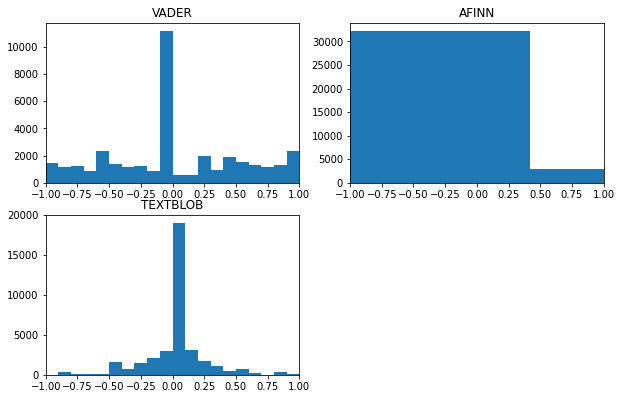

In [25]:
# Rescale AFINN
df["AFINN_scaled"] = [s / 10 for s in df.AFINN]
plt.figure(figsize=(10,10))
n_bins=20  #The number of bins in each histogram.

plt.subplot(3,2,1)   
plt.hist(df.VADER, bins=n_bins)
plt.title('VADER')
plt.xlim([-1, 1]) #Set the range of x-axis. 

plt.subplot(3,2,2)
plt.hist(df.AFINN_scaled, bins=n_bins)
plt.title('AFINN')
plt.xlim([-1, 1])

plt.subplot(3,2,3)
plt.hist(df.TextBlob, bins=n_bins)
plt.title('TEXTBLOB')
plt.xlim([-1, 1])

#### Time series of the data distribution

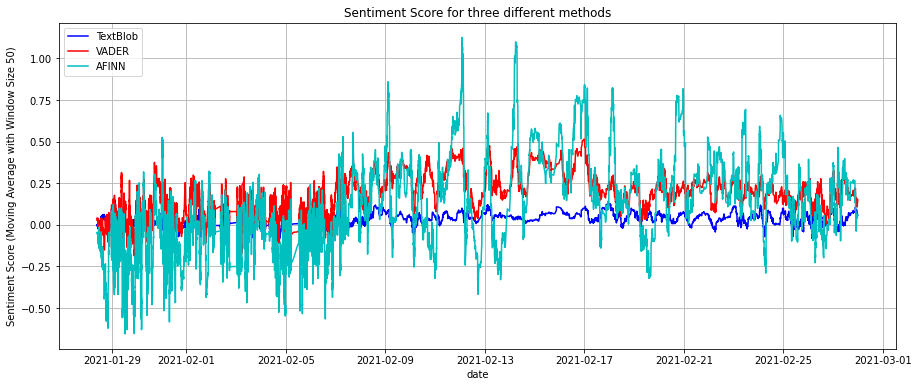

In [26]:
## Examine the time series plot 
df = df.sort_values(by=['datetime'], ascending=True)

plt.figure(figsize=(15, 6))

plt.plot(df.datetime, df.TextBlob.rolling(window=50).mean(), "-b", label="TextBlob")
plt.plot(df.datetime, df.VADER.rolling(window=50).mean(), "-r", label="VADER")
plt.plot(df.datetime, df.AFINN_scaled.rolling(window=50).mean(), "-c", label="AFINN")
plt.legend(loc="upper left")
plt.title("Sentiment Score for three different methods")
plt.xlabel("date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

### Emotion Analysis

In [27]:
from nrclex import NRCLex 
df['AllEmotions'] = [NRCLex(s) for s in df.comments]
df['AllEmotions'] = df['AllEmotions'].apply(lambda x: x.affect_frequencies)
df['Anger'] = df['AllEmotions'].apply(lambda x: x.get('anger'))
df['fear'] = df['AllEmotions'].apply(lambda x: x.get('fear'))
df['positive'] = df['AllEmotions'].apply(lambda x: x.get('positive'))
df['negative'] = df['AllEmotions'].apply(lambda x: x.get('negative'))
df['joy'] = df['AllEmotions'].apply(lambda x: x.get('joy'))
df['disgust'] = df['AllEmotions'].apply(lambda x: x.get('disgust'))

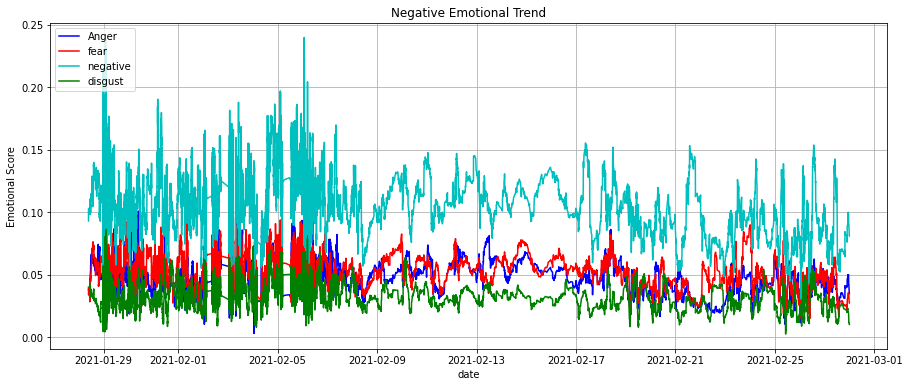

In [28]:
## Examine all the negative emotion
plt.figure(figsize=(15, 6))
plt.plot(df.datetime, df.Anger.rolling(window=50).mean(), "-b", label="Anger")
plt.plot(df.datetime, df.fear.rolling(window=50).mean(), "-r", label="fear")
plt.plot(df.datetime, df.negative.rolling(window=50).mean(), "-c", label="negative")
plt.plot(df.datetime, df.disgust.rolling(window=50).mean(), "-g", label="disgust")
plt.legend(loc="upper left")
plt.title("Negative Emotional Trend")
plt.xlabel("date")
plt.ylabel("Emotional Score")
plt.grid(axis='both')
plt.show()

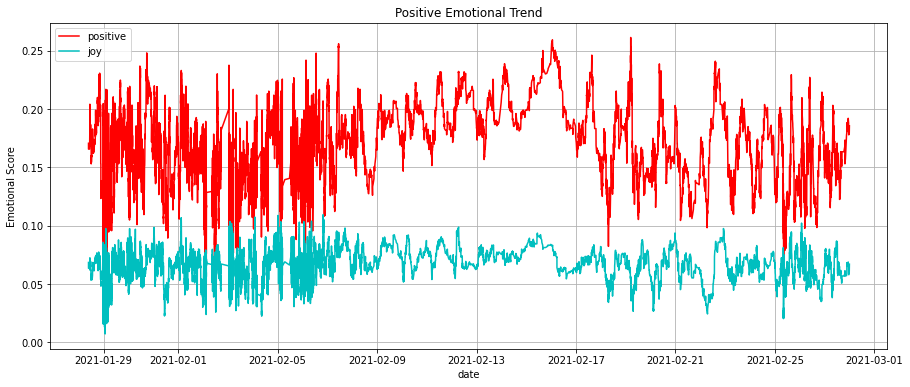

In [29]:
# Examine all the positive emotion 
plt.figure(figsize=(15, 6))
plt.plot(df.datetime, df.positive.rolling(window=50).mean(), "-r", label="positive")
plt.plot(df.datetime, df.joy.rolling(window=50).mean(), "-c", label="joy")
plt.legend(loc="upper left")
plt.title("Positive Emotional Trend")
plt.xlabel("date")
plt.ylabel("Emotional Score")
plt.grid(axis='both')
plt.show()

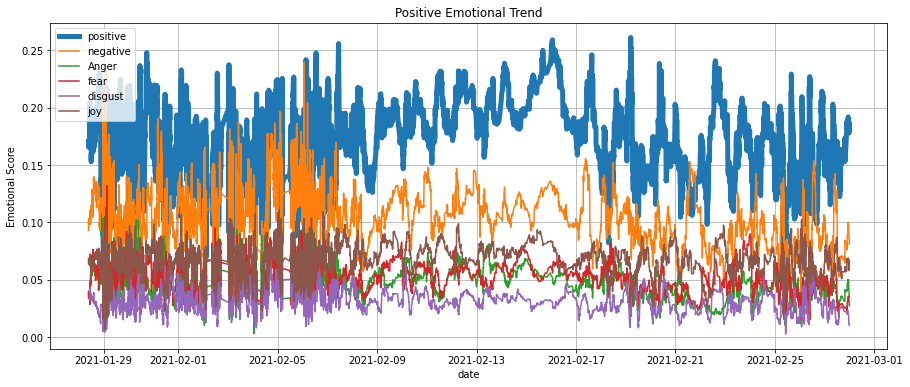

In [155]:
# Examine all the positive emotion 
plt.figure(figsize=(15, 6))
plt.plot(df.datetime, df.positive.rolling(window=50).mean(), label="positive",linewidth=5.0)
plt.plot(df.datetime, df.negative.rolling(window=50).mean(), label="negative")
plt.plot(df.datetime, df.Anger.rolling(window=50).mean(), label="Anger")
plt.plot(df.datetime, df.fear.rolling(window=50).mean(), label="fear")
plt.plot(df.datetime, df.disgust.rolling(window=50).mean(), label="disgust")
plt.plot(df.datetime, df.joy.rolling(window=50).mean(), label="joy")
plt.legend(loc="upper left")
plt.title("Positive Emotional Trend")
plt.xlabel("date")
plt.ylabel("Emotional Score")
plt.grid(axis='both')
plt.show()

# Part 5: Download GME and AMC Stock Price Data from Yahoo Finance

In [30]:
#!pip install pandas_datareader
#!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr
#The frequency for intraday data (1m is not available; 5 minutes or beyond still work)
interval='5m'

# We would like to see the daily stock price of GME.
tickers = 'GME'

# We would like all available data from start_date until end_date.
start_date = '2021-01-28'
end_date = '2021-02-28'

# User pandas_reader.data.DataReader to load the desired data from Yahoo Finance.
yf.pdr_override()
df_gme_intraday = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, interval=interval)

#To get the daily price, simple remove "interval"
df_gme_daily= pdr.get_data_yahoo(tickers, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
interval='5m'
tickers = 'AMC'
start_date = '2021-01-28'
end_date = '2021-02-28'
yf.pdr_override()
df_amc_intraday = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, interval=interval)
df_amc_daily= pdr.get_data_yahoo(tickers, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
# Download GME daily stock price
df_gme_daily.reset_index(inplace=True)
df_gme_daily

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,193.600006,58815800
1,2021-01-29,379.709991,413.980011,250.000000,325.000000,325.000000,50259200
2,2021-02-01,316.559998,322.000000,212.000000,225.000000,225.000000,37382200
3,2021-02-02,140.759995,158.000000,74.220001,90.000000,90.000000,78183100
4,2021-02-03,112.010002,113.400002,85.250000,92.410004,92.410004,42698500
5,2021-02-04,91.190002,91.500000,53.330002,53.500000,53.500000,62427300
6,2021-02-05,54.040001,95.000000,51.090000,63.770000,63.770000,80886300
7,2021-02-08,72.410004,72.660004,58.020000,60.000000,60.000000,25687300
8,2021-02-09,56.610001,57.000000,46.520000,50.310001,50.310001,26843100
9,2021-02-10,50.770000,62.830002,46.549999,51.200001,51.200001,36455000


No handles with labels found to put in legend.


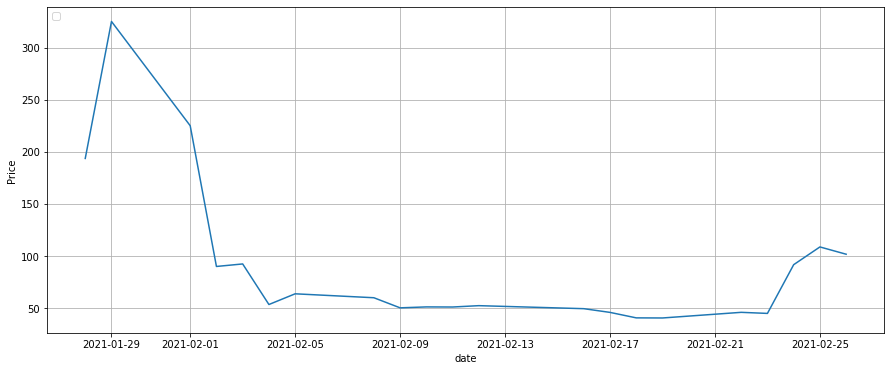

In [33]:
# Visualize the stock price of GME stock
plt.figure(figsize=(15, 6))
plt.plot(df_gme_daily.Date, df_gme_daily.Close)
plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("Price")
plt.grid(axis='both')
plt.show()

In [34]:
# Download AMC daily stock price
df_amc_daily.reset_index(inplace=True)
df_amc_daily

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-28,11.98,16.50,6.51,8.63,8.63,591223900
1,2021-01-29,14.31,16.00,11.60,13.26,13.26,602193300
2,2021-02-01,17.00,17.25,12.91,13.30,13.30,434608000
3,2021-02-02,9.48,10.10,6.00,7.82,7.82,462775900
4,2021-02-03,8.85,9.77,7.89,8.97,8.97,221405100
5,2021-02-04,8.70,8.74,7.00,7.09,7.09,162985800
6,2021-02-05,7.17,8.27,6.52,6.83,6.83,195267800
7,2021-02-08,6.88,6.89,5.75,6.18,6.18,128171500
8,2021-02-09,5.81,5.81,5.26,5.50,5.50,102588100
9,2021-02-10,5.71,6.59,5.45,5.80,5.80,152810800


No handles with labels found to put in legend.


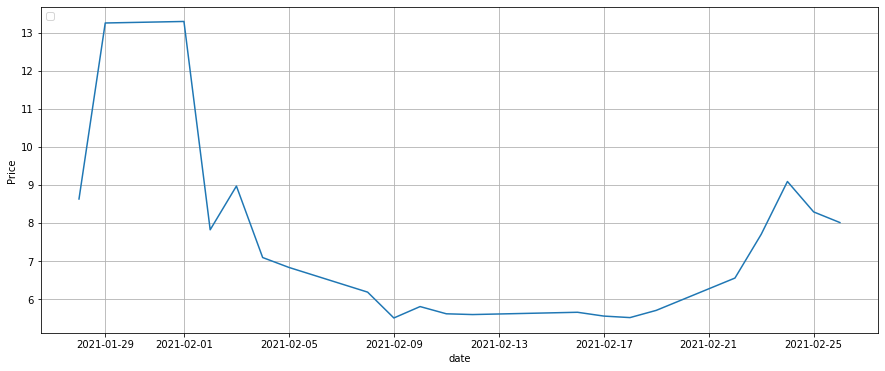

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(df_amc_daily.Date, df_amc_daily.Close)
plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("Price")
plt.grid(axis='both')
plt.show()

# Part 6: Analyze the Relationship between Comments and AMC & GME Stock  Price Data

### Comments vs AMC

In [127]:
# Group by every comment in each calendar day together as a row
date_comment_df = pd.DataFrame(df.groupby("date")["comments"].agg(lambda column: "".join(column)))
date_comment_df.reset_index(inplace=True)
date_comment_df.head(10)
#date_comment_df.iloc[0:1,]

,date,comments
0,2021-01-28,autist journey one month storytimmade melvin l...
1,2021-01-29,repost boyniceblaze fuck sellmom cameraamc let...
2,2021-01-30,sell limit today hold updattos wont allow high...
3,2021-01-31,back forwarddad friend said go crash economi t...
4,2021-02-01,job interview watch big short got ban day trad...
5,2021-02-02,financi news site list specif say reddit buy s...
6,2021-02-03,full yolocash wsb tearfeel bleed share fidel a...
7,2021-02-04,robinhood reject high sell limitgamestop appoi...
8,2021-02-05,accord reuter yellen say want understand deepl...
9,2021-02-06,amc forsaken bought share amc might well inves...


In [128]:
# Write the key terms discoverd by using N-Gram vectorizer in each day's column
for index, row in date_comment_df.iterrows():
    
    vectorizer=CountVectorizer(ngram_range=(2,2))
    comments = re.sub('[0-9]', '', row["comments"])
    DTM_test = vectorizer.fit_transform([comments])
    df_test = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'FrequencyN_GRAM': DTM_test.sum(axis=0).tolist()[0]
                  })
    df_test.sort_values(by="FrequencyN_GRAM",inplace=True,ascending=False)
    df_test.reset_index(inplace=True,drop=True)
    df_test_key = df_test.iloc[0:1,]
    key_term = df_test_key['Term'].tolist()[0]
    date_comment_df.loc[index,'key_term'] = key_term
    term_frequency = df_test_key['FrequencyN_GRAM'].tolist()[0]
    date_comment_df.loc[index,key_term] = term_frequency
    #print()
    #break
    #for index in range(1):
        #key_element = key_term[index]
        #key_element_fre = term_frequency[index]
        #date_comment_df.loc[index,key_element] = key_element_fre
date_comment_df = date_comment_df.fillna(0)    
date_comment_df

,date,comments,key_term,hedg fund,pop pop,short interest,sma sma,market cap,amzn amzn,urltoken best,demo day,vol total,nake short
0,2021-01-28,autist journey one month storytimmade melvin l...,hedg fund,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-29,repost boyniceblaze fuck sellmom cameraamc let...,hedg fund,981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-30,sell limit today hold updattos wont allow high...,hedg fund,284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-31,back forwarddad friend said go crash economi t...,hedg fund,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-01,job interview watch big short got ban day trad...,hedg fund,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-02-02,financi news site list specif say reddit buy s...,hedg fund,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021-02-03,full yolocash wsb tearfeel bleed share fidel a...,hedg fund,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2021-02-04,robinhood reject high sell limitgamestop appoi...,hedg fund,176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2021-02-05,accord reuter yellen say want understand deepl...,hedg fund,283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2021-02-06,amc forsaken bought share amc might well inves...,hedg fund,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# Create a new column with "0-1" indicators of negative or positive returns for AMC stock 
df_amc_daily['date_time'] = pd.to_datetime(df_amc_daily['Date'], format='%Y-%m-%d %H:%M:%S')
df_amc_daily['Date'] = df_amc_daily.date_time.dt.date
df_amc_daily['return'] = df_amc_daily['Adj Close']/df_amc_daily['Adj Close'].shift(1)-1
df_amc_daily['amc_return_index'] =  np.where(df_amc_daily['return']>0, 1, 0)
df_amc_daily_edited=df_amc_daily[['Date','amc_return_index','return','Adj Close']]
df_amc_daily_edited.columns =['date','amc_return_index','amc_return','amc_adj_close']
date_comment_df_stock = pd.merge(df_amc_daily_edited,date_comment_df,on='date')
date_comment_df_stock
#df_amc_daily_edited

,date,amc_return_index,amc_return,amc_adj_close,comments,key_term,hedg fund,pop pop,short interest,sma sma,market cap,amzn amzn,urltoken best,demo day,vol total,nake short
0,2021-01-28,0,NaN,8.63,autist journey one month storytimmade melvin l...,hedg fund,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-29,1,0.536501,13.26,repost boyniceblaze fuck sellmom cameraamc let...,hedg fund,981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-02-01,1,0.003017,13.30,job interview watch big short got ban day trad...,hedg fund,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-02-02,0,-0.412030,7.82,financi news site list specif say reddit buy s...,hedg fund,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-03,1,0.147059,8.97,full yolocash wsb tearfeel bleed share fidel a...,hedg fund,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-02-04,0,-0.209588,7.09,robinhood reject high sell limitgamestop appoi...,hedg fund,176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021-02-05,0,-0.036671,6.83,accord reuter yellen say want understand deepl...,hedg fund,283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2021-02-08,0,-0.095168,6.18,newbi look gme greet fellow tard autist ape go...,short interest,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2021-02-09,0,-0.110032,5.50,tdc immedi upsid hey lad lurk sinc today bring...,hedg fund,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2021-02-10,1,0.054545,5.80,crsr crush expect cheapest growth stock right ...,sma sma,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# Create an another new column with "0-1" indicators of negative or positive returns for GME stock 
df_gme_daily['date_time'] = pd.to_datetime(df_gme_daily['Date'], format='%Y-%m-%d %H:%M:%S')
df_gme_daily['Date'] = df_gme_daily.date_time.dt.date
df_gme_daily['return'] = df_gme_daily['Adj Close']/df_gme_daily['Adj Close'].shift(1)-1
df_gme_daily['gme_return_index'] =  np.where(df_gme_daily['return']>0, 1, 0)
df_gme_daily_edited=df_gme_daily[['Date','gme_return_index','return','Adj Close']]
df_gme_daily_edited.columns =['date','gme_return_index','gme_return','gme_adj_close']
date_comment_df_stock = pd.merge(df_gme_daily_edited,date_comment_df_stock,on='date')
date_comment_df_stock

,date,gme_return_index,gme_return,gme_adj_close,amc_return_index,amc_return,amc_adj_close,comments,key_term,hedg fund,pop pop,short interest,sma sma,market cap,amzn amzn,urltoken best,demo day,vol total,nake short
0,2021-01-28,0,NaN,193.600006,0,NaN,8.63,autist journey one month storytimmade melvin l...,hedg fund,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-29,1,0.678719,325.000000,1,0.536501,13.26,repost boyniceblaze fuck sellmom cameraamc let...,hedg fund,981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-02-01,0,-0.307692,225.000000,1,0.003017,13.30,job interview watch big short got ban day trad...,hedg fund,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-02-02,0,-0.600000,90.000000,0,-0.412030,7.82,financi news site list specif say reddit buy s...,hedg fund,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-03,1,0.026778,92.410004,1,0.147059,8.97,full yolocash wsb tearfeel bleed share fidel a...,hedg fund,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-02-04,0,-0.421058,53.500000,0,-0.209588,7.09,robinhood reject high sell limitgamestop appoi...,hedg fund,176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021-02-05,1,0.191963,63.770000,0,-0.036671,6.83,accord reuter yellen say want understand deepl...,hedg fund,283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2021-02-08,0,-0.059119,60.000000,0,-0.095168,6.18,newbi look gme greet fellow tard autist ape go...,short interest,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2021-02-09,0,-0.161500,50.310001,0,-0.110032,5.50,tdc immedi upsid hey lad lurk sinc today bring...,hedg fund,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2021-02-10,1,0.017690,51.200001,1,0.054545,5.80,crsr crush expect cheapest growth stock right ...,sma sma,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0


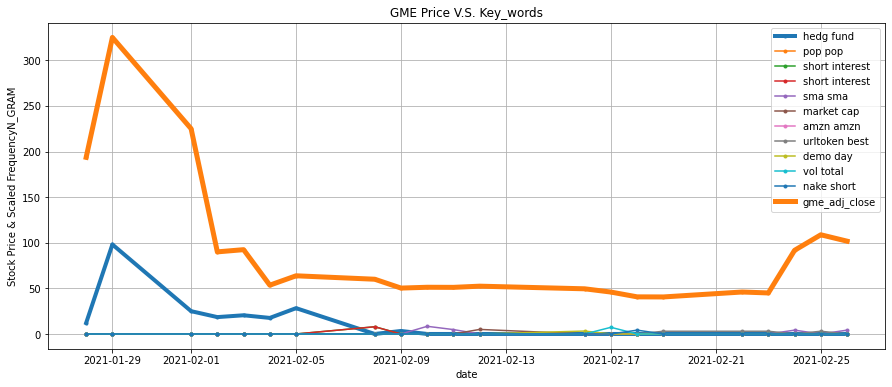

In [149]:
plt.figure(figsize=(15, 6))



plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['hedg fund']], '.-',label="hedg fund",linewidth=4.0)
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['pop pop']],'.-', label="pop pop")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['short interest']],'.-', label="short interest")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['short interest']],'.-', label="short interest")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['sma sma']],'.-', label="sma sma")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['market cap']],'.-', label="market cap")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['amzn amzn']],'.-', label="amzn amzn")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['urltoken best']],'.-', label="urltoken best")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['demo day']],'.-', label="demo day")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['vol total']],'.-', label="vol total")
plt.plot(date_comment_df_stock.date, [s/10 for s in date_comment_df_stock['nake short']],'.-', label="nake short")
plt.plot(date_comment_df_stock.date, date_comment_df_stock['gme_adj_close'],'.-',label="gme_adj_close",linewidth=5.0)


plt.legend(loc="upper right")
plt.title("GME Price V.S. Key_words")
plt.xlabel("date")
plt.ylabel("Stock Price & Scaled FrequencyN_GRAM")
plt.grid(axis='both')
plt.show()

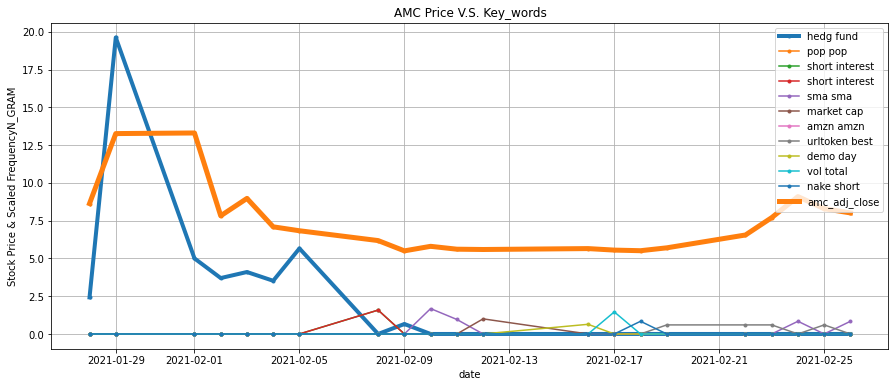

In [150]:
plt.figure(figsize=(15, 6))



plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['hedg fund']], '.-',label="hedg fund",linewidth=4.0)
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['pop pop']],'.-', label="pop pop")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['short interest']],'.-', label="short interest")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['short interest']],'.-', label="short interest")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['sma sma']],'.-', label="sma sma")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['market cap']],'.-', label="market cap")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['amzn amzn']],'.-', label="amzn amzn")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['urltoken best']],'.-', label="urltoken best")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['demo day']],'.-', label="demo day")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['vol total']],'.-', label="vol total")
plt.plot(date_comment_df_stock.date, [s/50 for s in date_comment_df_stock['nake short']],'.-', label="nake short")
plt.plot(date_comment_df_stock.date, date_comment_df_stock['amc_adj_close'],'.-',label="amc_adj_close",linewidth=5.0)


plt.legend(loc="upper right")
plt.title("AMC Price V.S. Key_words")
plt.xlabel("date")
plt.ylabel("Stock Price & Scaled FrequencyN_GRAM")
plt.grid(axis='both')
plt.show()

# Part 7: Machine Learning Prediction on Return Index

### Logestic regression 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import l1_min_c
import numpy as np

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(date_comment_df_stock, test_size=0.3,random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
    
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

nltk_stopwords = nltk.corpus.stopwords.words("english") 
    
vectorizer_sparselr=CountVectorizer(stop_words=nltk_stopwords,binary=True)

train_x = vectorizer_sparselr.fit_transform(df_train["comments"])
train_y = df_train["gme_return_index"]

test_x = vectorizer_sparselr.transform(df_test["comments"])
test_y = df_test["gme_return_index"]


Clist = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=10, num=20)


sparselr = LogisticRegressionCV(penalty='l1', 
                            solver='liblinear',
                            max_iter=100, 
                            Cs=Clist,
                            cv=5, 
                            tol=0.001,
                            random_state=2021,
                            scoring='roc_auc')
sparselr.fit(train_x,train_y)

LogisticRegressionCV(Cs=array([2.85714286e-01, 9.59948082e-01, 3.22525112e+00, 1.08362577e+01,
       3.64078567e+01, 1.22323783e+02, 4.10985682e+02, 1.38083721e+03,
       4.63936211e+03, 1.55874137e+04, 5.23708775e+04, 1.75956632e+05,
       5.91182309e+05, 1.98626513e+06, 6.67348991e+06, 2.24217134e+07,
       7.53328828e+07, 2.53104797e+08, 8.50386126e+08, 2.85714286e+09]),
                     cv=5, penalty='l1', random_state=2021, scoring='roc_auc',
                     solver='liblinear', tol=0.001)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
print('confusion_matrix')
print(confusion_matrix(test_y,sparselr.predict(test_x)))
print()
print('accuracy_score')
print(accuracy_score(test_y,sparselr.predict(test_x)))
print()
print('roc_auc_score')
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

confusion_matrix
[[4 0]
 [3 0]]

accuracy_score
0.5714285714285714

roc_auc_score
0.75


### XGBoost model

In [42]:
from xgboost import XGBClassifier
from sklearn import preprocessing

vectorizer_xgb=CountVectorizer(stop_words=nltk_stopwords,binary=True)
train_x = vectorizer_xgb.fit_transform(df_train["comments"])
train_y = df_train["gme_return_index"]
test_x = vectorizer_xgb.transform(df_test["comments"])
test_y = df_test["gme_return_index"]

le = preprocessing.LabelEncoder()
train_y=le.fit_transform(train_y)
test_y=le.transform(test_y)
from sklearn.model_selection import GridSearchCV   
param_list = {  
 'max_depth':[2, 5],       #Candidate for max_depth
 'n_estimators':[10, 100]   #Candidate for n_estimators
}
xgb=XGBClassifier(objective='binary:logistic',
                  nthread=4,
                  use_label_encoder=False,
                  verbosity = 0,
                  random_state=2021
                 )
xgb = GridSearchCV(estimator = xgb, 
                   param_grid = param_list,
                   scoring = 'roc_auc',  #The performance metric to select the best parameters.
                   cv=5                   #Number of folds, i.e., K
                  )
xgb.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=2021,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_m

In [43]:
print('confusion_matrix')
print(confusion_matrix(test_y,xgb.predict(test_x)))
print()
print('accuracy_score')
print(accuracy_score(test_y,xgb.predict(test_x)))
print()
print('roc_auc_score')
print(roc_auc_score(test_y,xgb.predict_proba(test_x)[:, 1]))

confusion_matrix
[[4 0]
 [3 0]]

accuracy_score
0.5714285714285714

roc_auc_score
0.5833333333333333


# Topic Correlation 

### Initialize the LDA Topic Model

In [67]:
from sklearn.decomposition import LatentDirichletAllocation

#Prepare the DTM in term frequencies.
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
vectorizer = CountVectorizer(stop_words='english')

DTM =vectorizer.fit_transform(date_comment_df_stock["comments"])

lda = LatentDirichletAllocation(n_components=6, # number of topics
                                n_jobs=-1,   #Use all processors
                                max_iter=10,   #Reduce it to speed up but compromise on the quality 
                                perp_tol=0.1,  #Increase it to speed up but compromise on the quality 
                                evaluate_every=1, #How often perplexity is calculated.
                                random_state=2021 #Random seed for reproducing the results.
                               )

lda.fit(DTM)

LatentDirichletAllocation(evaluate_every=1, n_components=6, n_jobs=-1,
                          random_state=2021)

### Find out the best number of topics

Text(0, 0.5, 'Perplexity')

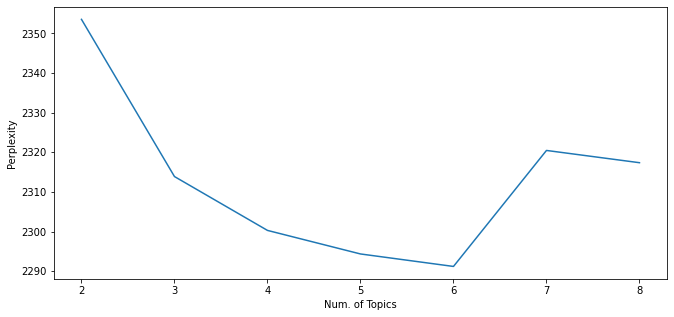

In [58]:
num_topics=[2,3,4,5,6,7,8]
perplexity=[]
for i in num_topics:
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))


plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

In [70]:
#Create the top words for each topic and put them together in the same data frame.
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TermOfTopic =pd.DataFrame([])
for i in range(6):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic

,0,1,2,3,4,5
0,sow,sow,buy,gme,urltoken,urltoken
1,etho,etho,gme,short,stock,compani
2,walker,walker,robinhood,share,share,market
3,tdoc,tdoc,hold,stock,short,year
4,nepot,nepot,stock,hold,market,stock
5,batter,batter,fuck,buy,compani,price
6,cobbl,cobbl,sell,price,price,palantir
7,slew,slew,trade,sell,gme,inflat
8,nosed,nosed,amc,fuck,year,product
9,angela,angela,market,market,buy,tesla


#### Topic 3 is the most related topic 

In [71]:
#Include topic distribution to the original data frame
#by concatenate df and DTopicM horizontally.
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([date_comment_df_stock, DTopicM], axis=1)
dfnew.head(9)

,date,gme_return_index,amc_return_index,comments,key_Term,0,1,2,3,4,5
0,2021-01-28,0,0,autist journey one month storytimmade melvin l...,['hedg fund' 'gme amc' 'buy gme' 'short intere...,5.423266e-06,5.423266e-06,0.597663,0.041270,0.361051,5.462685e-06
1,2021-01-29,1,1,repost boyniceblaze fuck sellmom cameraamc let...,['hedg fund' 'buy gme' 'gme amc' 'market manip...,6.023195e-07,6.023195e-07,0.999138,0.000824,0.000037,6.073107e-07
2,2021-02-01,0,1,job interview watch big short got ban day trad...,['hedg fund' 'short squeez' 'retail investor' ...,3.110160e-06,3.110160e-06,0.002095,0.994480,0.003416,3.137481e-06
3,2021-02-02,0,0,financi news site list specif say reddit buy s...,['hedg fund' 'short interest' 'ladder attack' ...,2.945261e-06,2.945261e-06,0.024844,0.461322,0.513825,2.967124e-06
4,2021-02-03,1,1,full yolocash wsb tearfeel bleed share fidel a...,['hedg fund' 'short interest' 'short squeez' '...,2.045708e-06,2.045708e-06,0.000002,0.999539,0.000453,2.062895e-06
5,2021-02-04,0,0,robinhood reject high sell limitgamestop appoi...,['hedg fund' 'diamond hand' 'financi advic' 'b...,2.596844e-06,2.596844e-06,0.000003,0.999191,0.000798,2.619037e-06
6,2021-02-05,1,0,accord reuter yellen say want understand deepl...,['hedg fund' 'diamond hand' 'financi advic' 'g...,1.913488e-06,1.913488e-06,0.000055,0.999937,0.000002,1.927739e-06
7,2021-02-08,0,0,newbi look gme greet fellow tard autist ape go...,['short interest' 'hedg fund' 'short posit' 's...,6.544498e-06,6.544498e-06,0.000007,0.411057,0.588916,6.606036e-06
8,2021-02-09,0,0,tdc immedi upsid hey lad lurk sinc today bring...,['hedg fund' 'urltoken best' 'urltoken urltoke...,8.805688e-06,8.805688e-06,0.002909,0.021785,0.975280,8.876302e-06


In [72]:
DTopicM = pd.DataFrame(lda.transform(DTM), columns =['price',"buy","short",'hold','sell','gme'])
dfnew = pd.concat([date_comment_df_stock, DTopicM], axis=1)
dfnew.head()

,date,gme_return_index,amc_return_index,comments,key_Term,price,buy,short,hold,sell,gme
0,2021-01-28,0,0,autist journey one month storytimmade melvin l...,['hedg fund' 'gme amc' 'buy gme' 'short intere...,5.423266e-06,5.423266e-06,0.597663,0.041270,0.361051,5.462685e-06
1,2021-01-29,1,1,repost boyniceblaze fuck sellmom cameraamc let...,['hedg fund' 'buy gme' 'gme amc' 'market manip...,6.023195e-07,6.023195e-07,0.999138,0.000824,0.000037,6.073107e-07
2,2021-02-01,0,1,job interview watch big short got ban day trad...,['hedg fund' 'short squeez' 'retail investor' ...,3.110160e-06,3.110160e-06,0.002095,0.994480,0.003416,3.137481e-06
3,2021-02-02,0,0,financi news site list specif say reddit buy s...,['hedg fund' 'short interest' 'ladder attack' ...,2.945261e-06,2.945261e-06,0.024844,0.461322,0.513825,2.967124e-06
4,2021-02-03,1,1,full yolocash wsb tearfeel bleed share fidel a...,['hedg fund' 'short interest' 'short squeez' '...,2.045708e-06,2.045708e-06,0.000002,0.999539,0.000453,2.062895e-06


(8.0, 0.0)

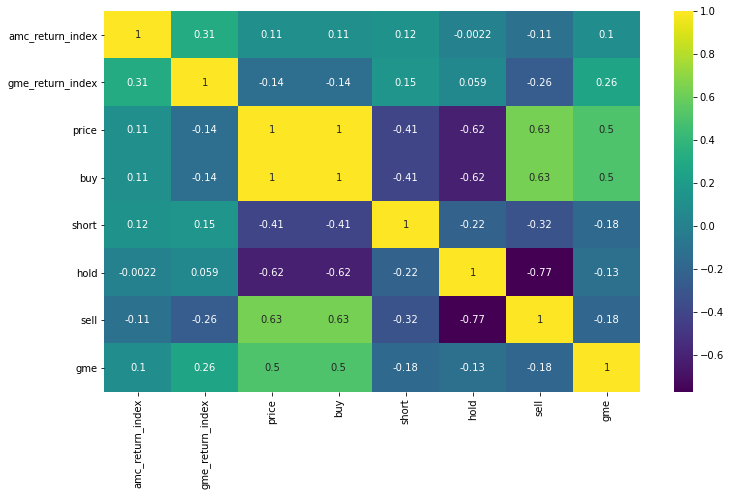

In [73]:

dfnew_corr = pd.DataFrame(dfnew,columns=['amc_return_index','gme_return_index','price',"buy","short",'hold','sell','gme'])

dfnew_corr.corr()

plt.figure(figsize=(12,7))
sns.heatmap(dfnew_corr.corr(),annot=True,cmap='viridis')
plt.ylim(8, 0)

# Emmotional Correlation Score

In [156]:
from nrclex import NRCLex 

date_comment_df_emtion = date_comment_df.copy()


date_comment_df_emtion['AllEmotions'] = [NRCLex(s) for s in date_comment_df_emtion.comments]
date_comment_df_emtion['AllEmotions'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.affect_frequencies)
date_comment_df_emtion['Anger'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.get('anger'))
date_comment_df_emtion['fear'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.get('fear'))
date_comment_df_emtion['positive'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.get('positive'))
date_comment_df_emtion['negative'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.get('negative'))
date_comment_df_emtion['joy'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.get('joy'))
date_comment_df_emtion['disgust'] = date_comment_df_emtion['AllEmotions'].apply(lambda x: x.get('disgust'))

df_emotion =  date_comment_df_emtion[['date','Anger','fear','joy','disgust','positive','negative']]
df_stock_index = pd.DataFrame(dfnew,columns=['date','amc_return_index','gme_return_index'])
df_emotion = pd.merge(df_emotion,df_stock_index,on='date')
df_emotion

,date,Anger,fear,joy,disgust,positive,negative,amc_return_index,gme_return_index
0,2021-01-28,0.078018,0.073151,0.089669,0.043212,0.186491,0.131996,0,0
1,2021-01-29,0.083011,0.080041,0.081902,0.047171,0.169148,0.144739,1,1
2,2021-02-01,0.066628,0.071161,0.088962,0.036766,0.199842,0.127599,1,0
3,2021-02-02,0.067320,0.071780,0.092118,0.038485,0.199885,0.128143,0,0
4,2021-02-03,0.069139,0.075191,0.091709,0.040357,0.192563,0.130666,1,1
5,2021-02-04,0.070870,0.073119,0.090462,0.044106,0.196408,0.132025,0,0
6,2021-02-05,0.074946,0.073425,0.093616,0.046092,0.184786,0.135344,0,1
7,2021-02-08,0.060718,0.063949,0.088940,0.028886,0.227670,0.116876,0,0
8,2021-02-09,0.066124,0.061313,0.086109,0.040587,0.218604,0.124846,0,0
9,2021-02-10,0.061091,0.062124,0.091378,0.038289,0.208054,0.122354,1,1


(8.0, 0.0)

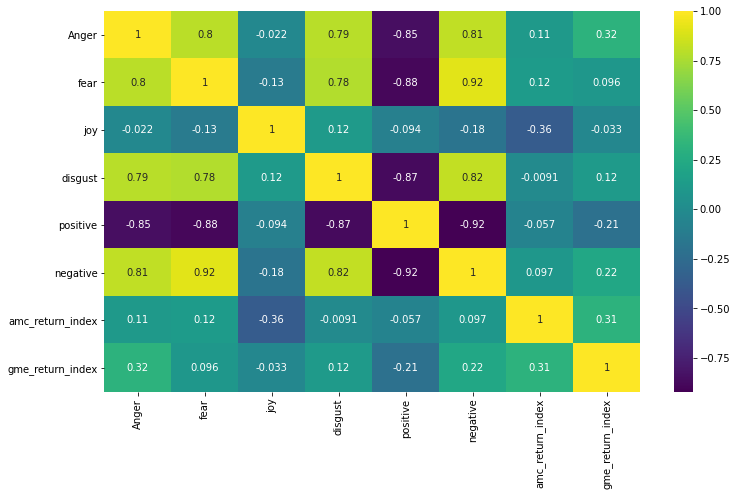

In [159]:
plt.figure(figsize=(12,7))
sns.heatmap(df_emotion.corr(),annot=True,cmap='viridis')
plt.ylim(8, 0)

(4.0, 0.0)

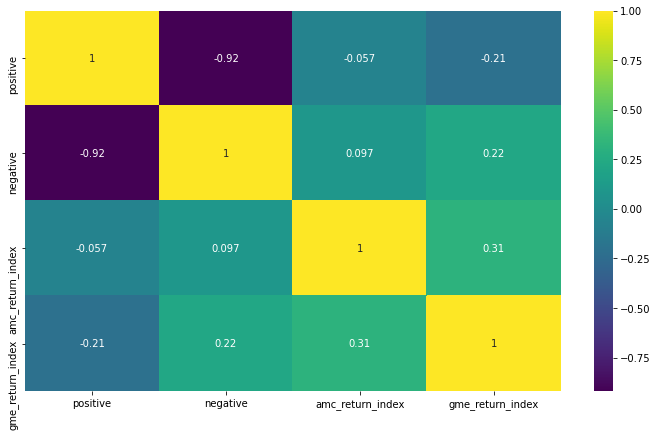

In [80]:
df_emotion =  date_comment_df_emtion[['date','positive','negative']]
df_stock_index = pd.DataFrame(dfnew,columns=['date','amc_return_index','gme_return_index'])
df_emotion = pd.merge(df_emotion,df_stock_index,on='date')
plt.figure(figsize=(12,7))
sns.heatmap(df_emotion.corr(),annot=True,cmap='viridis')
plt.ylim(4, 0)